In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Furniture_inventory_data.csv")

In [3]:
df = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results", "Defect rates"]]

In [4]:
df["Inspection results"].unique()

array(['Pending', 'Fail', 'Pass'], dtype=object)

In [5]:
mapping = {'Fail': -1, 'Pass': 1, 'Pending': 0}
df.loc[:, 'Inspection results'] = df['Inspection results'].map(mapping).fillna(0)

In [6]:
df["Inspection results"].unique()

array([0, -1, 1], dtype=object)

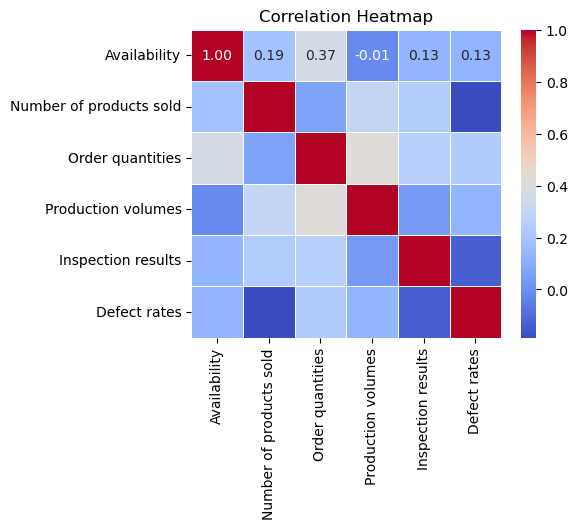

In [7]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

X = df[["Availability", "Number of products sold", "Order quantities", "Production volumes", "Inspection results"]]
y = df["Defect rates"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

predictions = model.predict(X_test)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - loss: 1864.2305 - val_loss: 157.7680
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 453.2188 - val_loss: 328.0641
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1825.3301 - val_loss: 397.8565
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1667.9299 - val_loss: 146.6377
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 640.2449 - val_loss: 47.9757
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 61.7220 - val_loss: 299.7105
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 306.3457 - val_loss: 560.4632
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 725.0571 - val_loss: 446.1343
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 665.8783 - val_loss: 130.6714
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 249.6076 - val_loss: 59.6888
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.8827 - val_loss: 246.7750
Epoch 12/100
2/2 ━━━━━━━━━━━━━

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE): 25.871786
R-squared (R²): -19.10191015399805


In [10]:
import pickle

filename = "Furniture_inventory_data_deficit_rates.pkl"

with open(filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model successfully saved to {filename}")

Model successfully saved to Furniture_inventory_data_deficit_rates.pkl
